In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('hotelreviews_sentiments.csv')
hotel_sentiments = data.groupby('Hotel_Name')[['Positive_Sentiment', 'Negative_Sentiment']].mean()
hotel_sentiments['Hotel_Score'] = (hotel_sentiments['Positive_Sentiment'] - abs(hotel_sentiments['Negative_Sentiment'])) * 50 + 50


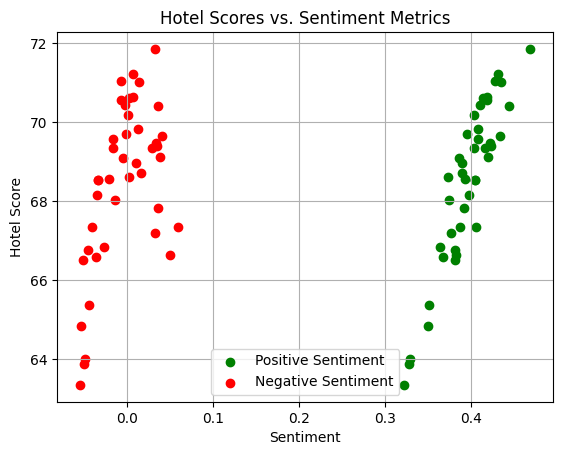

In [14]:
# Comparing the calculated scores with the raw sentiment data and actual reviews to ensure they match expectations
# Scatter plot: Positive sentiment vs. hotel score

plt.scatter(hotel_sentiments['Positive_Sentiment'], hotel_sentiments['Hotel_Score'], color='green', label='Positive Sentiment')
plt.scatter(hotel_sentiments['Negative_Sentiment'], hotel_sentiments['Hotel_Score'], color='red', label='Negative Sentiment')
plt.title("Hotel Scores vs. Sentiment Metrics")
plt.xlabel("Sentiment")
plt.ylabel("Hotel Score")
plt.legend()
plt.grid()
plt.show()

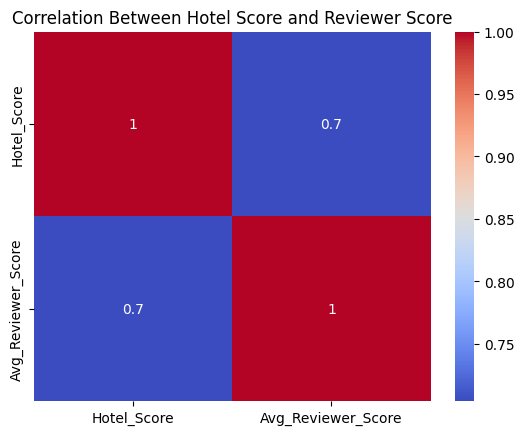

In [15]:
avg_reviewer_scores = data.groupby('Hotel_Name')['Reviewer_Score'].mean()
comparison = hotel_sentiments.merge(avg_reviewer_scores, on='Hotel_Name')
comparison = comparison.rename(columns={'Reviewer_Score': 'Avg_Reviewer_Score'})
correlation = comparison[['Hotel_Score', 'Avg_Reviewer_Score']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Between Hotel Score and Reviewer Score")
plt.show()


In [16]:
from scipy.stats import pearsonr

# Calculating the Pearson correlation between Hotel Score and Average Reviewer Score
corr, p_value = pearsonr(comparison['Hotel_Score'], comparison['Avg_Reviewer_Score'])
print(f"Correlation: {corr}, P-value: {p_value}")


Correlation: 0.7040006048617887, P-value: 1.9763185511629493e-07
